<a href="https://colab.research.google.com/github/lucaspinheiro27/MACHINE_LEARNING_DATA_SCIENCE/blob/main/PCA_Exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/FIAP/Machine Learning/PCA/pokedex.csv')
df.head(5)

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


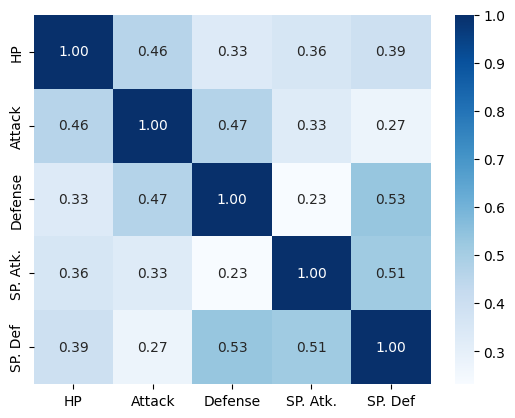

In [ ]:
cols = ['HP','Attack','Defense','SP. Atk.','SP. Def']
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', cmap='Blues')

df1 = df[cols]
scaled_df = scale(df1)


In [ ]:
components = len(cols)
pca = PCA(n_components=components)
pca_df = pca.fit_transform(scaled_df)

# verificação do número de componentes pelo autovalor
print(pca.explained_variance_)
print(pca.explained_variance_.sum())

[2.5640774  0.83794466 0.75014729 0.55391813 0.29803113]
5.004118616144976


In [ ]:
pca_df
columns = ['pca_comp_%i' % i for i in range(components)]
df_pca  = pd.DataFrame(pca_df, columns=columns, index=df1.index)
df_pca.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4
0,-1.490184,0.721979,0.204376,-0.090208,0.138499
1,-0.405590,0.769855,0.170415,0.004568,0.129014
2,1.096693,0.774097,0.129868,0.086337,0.126396
3,2.562107,0.770963,0.879493,-0.363004,-0.150971
4,-1.961758,0.449799,-0.000288,-0.349779,0.037210


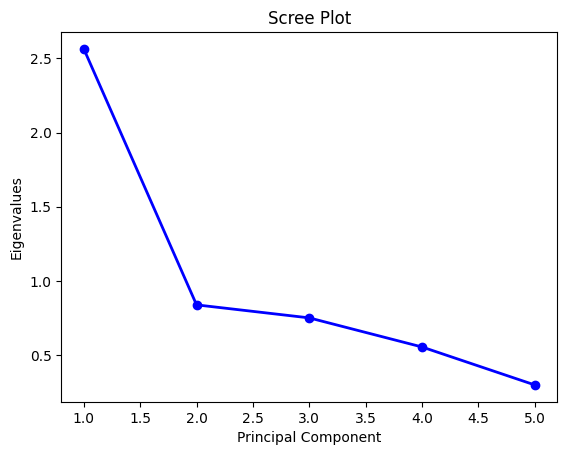

In [ ]:
plt.plot(np.arange(pca.n_components_)+1, pca.explained_variance_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

In [ ]:
# variância explicada individual
print(pca.explained_variance_ratio_)

# variância explicada acumulada
np.cumsum(pca.explained_variance_ratio_)

[0.51239341 0.167451   0.14990598 0.11069245 0.05955717]


array([0.51239341, 0.67984441, 0.82975039, 0.94044283, 1.        ])

<Axes: >

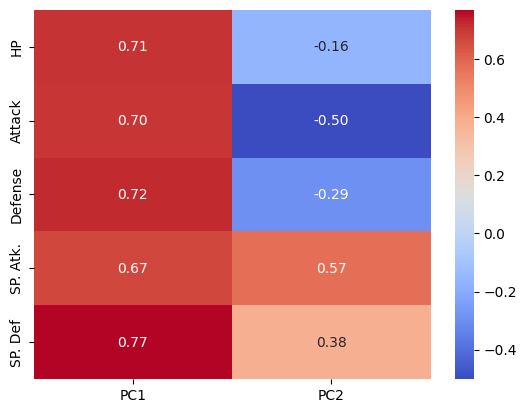

In [ ]:
# instanciar o pca
components = 2
pca = PCA(n_components=components)

# retreinar
pca_retreinado = pca.fit_transform(scaled_df)
cargas = pca.components_.T * np.sqrt(pca.explained_variance_)
componentes_cols = ['PC'+str(i) for i in range(1,components+1)]
df_cargas = pd.DataFrame(cargas, columns=componentes_cols, index=cols)

# cargas grafico
sns.heatmap(df_cargas, annot=True, fmt='.2f', cmap='coolwarm')


<Axes: >

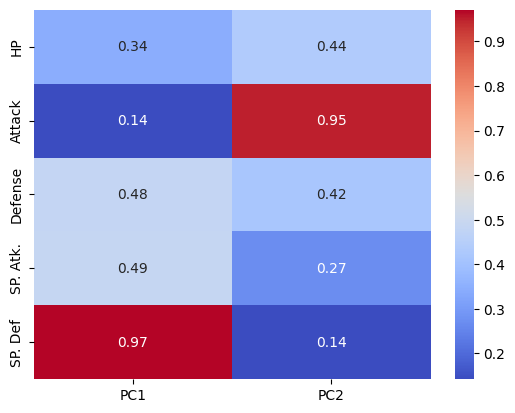

In [ ]:
fa = FactorAnalysis(n_components=components, rotation='varimax', svd_method='lapack')
trf_fa = fa.fit_transform(scaled_df)
cargas = fa.components_.T
componentes_cols = ['PC'+str(i) for i in range(1, components+1)]
df_cargas = pd.DataFrame(cargas, columns=componentes_cols, index=cols)
sns.heatmap(df_cargas, annot=True, fmt='.2f', cmap='coolwarm')